# Churn Data With Model Evaluation


### Library Imports

The following libraries are imported for data analysis, visualization, and machine learning:

- **os, numpy, pandas:** Data manipulation and handling
- **matplotlib, seaborn:** Data visualization
- **scikit-learn:** Data preprocessing, model selection, and evaluation metrics
- **tensorflow/keras:** Building and training deep learning models

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd


### Data Preprocessing

- Removed null and duplicate values to ensure data quality.
- Inspected the data types of each column and visualized summary statistics using `describe()`.
- Stripped whitespace from column names and all string values for consistency:
- Explored unique values in each categorical (object-type) column to better understand the data:
- We analyzed the class distribution in the target variable `Exited` using `df['Exited'].value_counts()`.  
- This helps us understand how many customers have exited (churned) versus those who have not, which is important for identifying class imbalance in/



In [ ]:
df= pd.read_csv('Churn_Modelling.csv')

In [ ]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [ ]:
print(df.describe(include='all'))

          RowNumber    CustomerId Surname   CreditScore Gender           Age  \
count   10000.00000  1.000000e+04   10000  10000.000000  10000  10000.000000   
unique          NaN           NaN    2932           NaN      2           NaN   
top             NaN           NaN   Smith           NaN   Male           NaN   
freq            NaN           NaN      32           NaN   5457           NaN   
mean     5000.50000  1.569094e+07     NaN    650.528800    NaN     38.921800   
std      2886.89568  7.193619e+04     NaN     96.653299    NaN     10.487806   
min         1.00000  1.556570e+07     NaN    350.000000    NaN     18.000000   
25%      2500.75000  1.562853e+07     NaN    584.000000    NaN     32.000000   
50%      5000.50000  1.569074e+07     NaN    652.000000    NaN     37.000000   
75%      7500.25000  1.575323e+07     NaN    718.000000    NaN     44.000000   
max     10000.00000  1.581569e+07     NaN    850.000000    NaN     92.000000   

              Tenure        Balance  Nu

In [ ]:
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13880\2390159178.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [ ]:
df['Exited'].value_counts()


Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

We can say our dataset has class imabalance in ratio of 4:1


### Data Visualization

- Plotted histograms with KDE for numerical features (`Age`, `Balance`, `CreditScore`) to understand their distributions.
- Used boxplots to compare the distribution of `Age`, `Balance`, and `CreditScore` between customers who exited and those who did not.
- Created countplots for categorical features (`Geography`, `Gender`, `HasCrCard`, `IsActiveMember`) with respect to the target variable `Exited` to visualize the relationship between these features

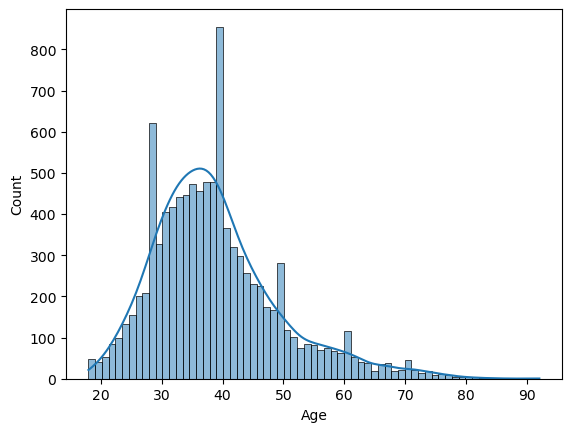

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example for Age
sns.histplot(df['Age'], kde=True)
plt.show()


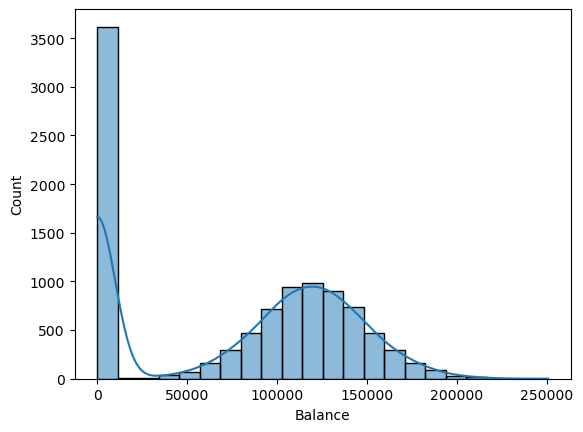

In [ ]:
sns.histplot(df['Balance'], kde=True)
plt.show()

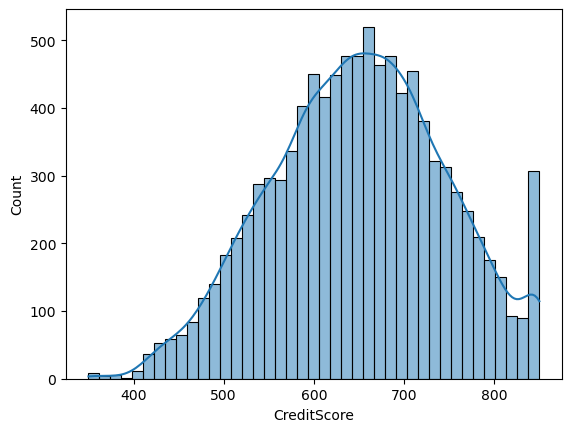

In [ ]:
sns.histplot(df['CreditScore'], kde=True)
plt.show()

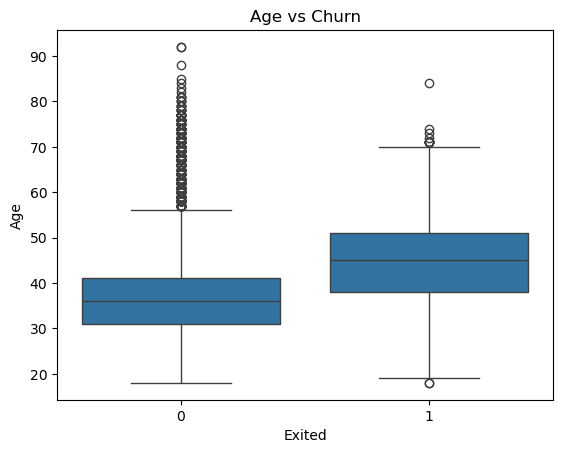

In [ ]:
sns.boxplot(x='Exited', y='Age', data=df)
plt.title("Age vs Churn")
plt.show()




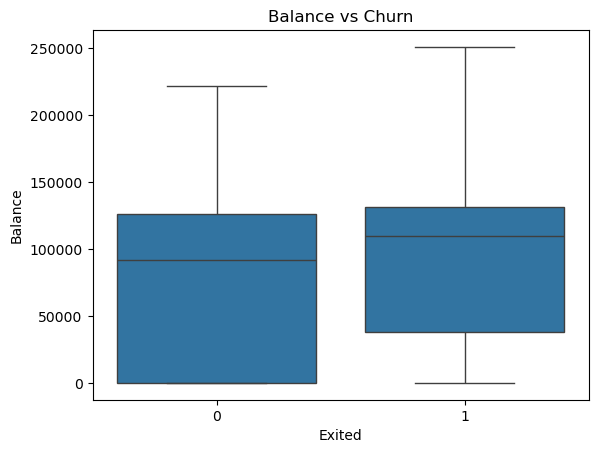

In [ ]:
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title("Balance vs Churn")
plt.show()


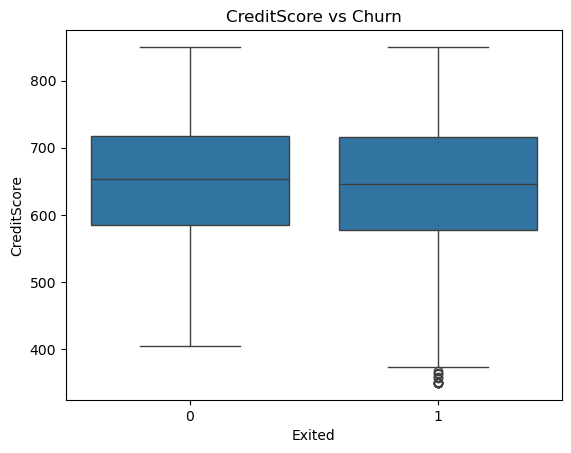

In [ ]:
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title("CreditScore vs Churn")
plt.show()


<Axes: xlabel='Geography', ylabel='count'>

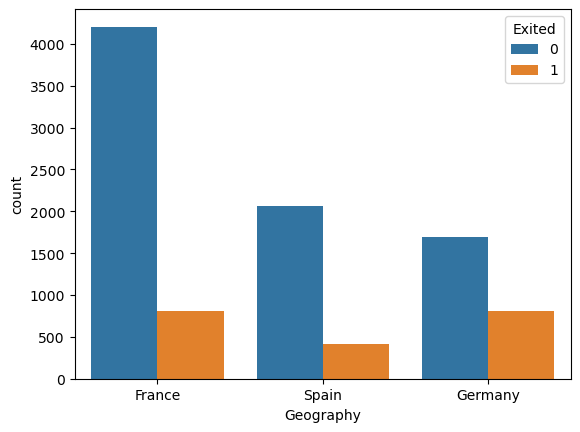

In [ ]:
#countplot for categorical features
sns.countplot(x='Geography', hue='Exited', data=df)

<Axes: xlabel='Gender', ylabel='count'>

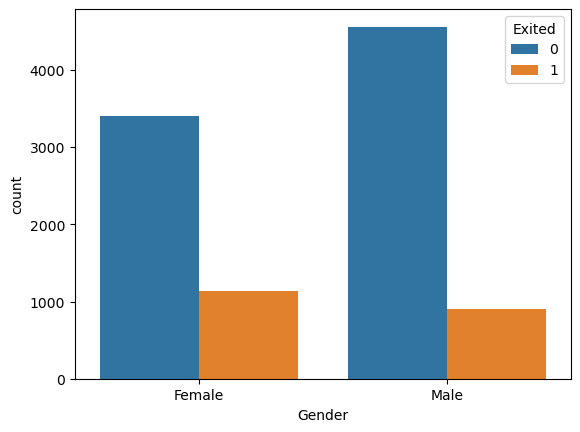

In [ ]:
sns.countplot(x='Gender', hue='Exited', data=df)

<Axes: xlabel='HasCrCard', ylabel='count'>

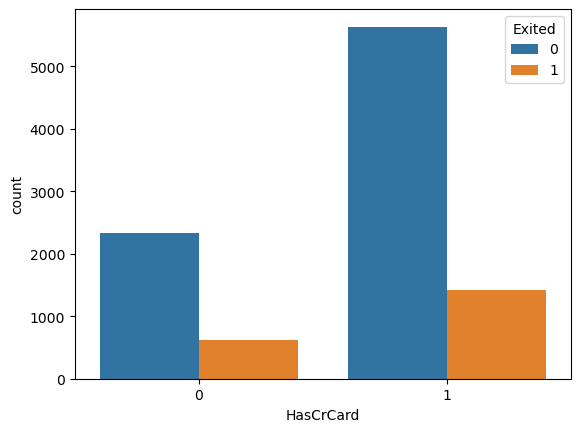

In [ ]:
sns.countplot(x='HasCrCard', hue='Exited', data=df)

<Axes: xlabel='IsActiveMember', ylabel='count'>

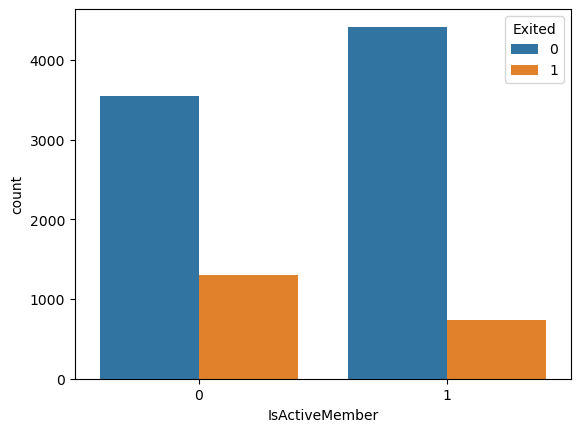

In [ ]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df)

### Insights from Data Visualization

- **Age:** Customers who exited tend to be older on average, as seen in both the histogram and boxplot.
- **Balance:** There is no clear separation in balance between exited and non-exited customers, indicating balance alone may not be a strong predictor.
- **Credit Score:** The distribution of credit scores is similar for both groups, suggesting limited impact on churn.
- **Geography:** Certain regions have higher churn rates, as shown by the countplot.
- **Gender:** Churn rates for females is little higher than males.
- **HasCrCard & IsActiveMember:** Customers who are not active members show a higher tendency to churn, while having a credit card does not show a strong relationship with churn.

These insights help identify which features are more relevant for predicting customer

In teh cell below we one hot encode our cateogrical column named `Geography`

In [ ]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


### Logistic Regression Model Training and Evaluation

- Computed class weights using `compute_class_weight` to address class imbalance in the target variable.
- Split the dataset into training and testing sets with stratification to preserve class distribution.
- Applied one-hot encoding to categorical variables and standardized the features using `StandardScaler`.
- Trained a logistic regression model with balanced class weights to improve performance on the minority class.
- Evaluated the model on the test set using `classification_report`, which provides precision, recall, f1-score, and support for each class.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Your target variable
y = df['Exited']

# Compute the weights
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
# Map to class labels
class_weights = dict(zip(np.unique(y), weights))

print(class_weights)


{0: 0.6279040562602034, 1: 2.454590083456063}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X=df.drop(['Exited','Surname','RowNumber'],axis=1)
y=df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()

In [ ]:
print(X_train.dtypes)

CustomerId             int64
CreditScore            int64
Gender                object
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_Germany       bool
Geography_Spain         bool
dtype: object


In [ ]:
X_train=pd.get_dummies(X_train, drop_first=True)
X_test=pd.get_dummies(X_test, drop_first=True)

In [ ]:
print(X_train.dtypes)

CustomerId             int64
CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_Germany       bool
Geography_Spain         bool
Gender_Male             bool
dtype: object


In [ ]:
print(np.mean(X_train,axis=0))

CustomerId           1.569088e+07
CreditScore          6.507525e+02
Age                  3.894662e+01
Tenure               5.016625e+00
Balance              7.638121e+04
NumOfProducts        1.529500e+00
HasCrCard            7.087500e-01
IsActiveMember       5.148750e-01
EstimatedSalary      9.973081e+04
Geography_Germany    2.506250e-01
Geography_Spain      2.502500e-01
Gender_Male          5.483750e-01
dtype: float64


In [ ]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [ ]:
print(np.mean(x_train,axis=0))

[ 8.90931773e-15 -5.72875081e-16  2.48689958e-16 -9.81437154e-17
  5.77315973e-17 -9.50350909e-17  4.44089210e-18  4.26325641e-17
 -6.69464484e-17  9.45910017e-17  7.77156117e-17  7.10542736e-17]


In [ ]:
print(np.std(x_train,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create model with balanced class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Fit the model
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report

# Predict
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1593
           1       0.37      0.68      0.48       407

    accuracy                           0.70      2000
   macro avg       0.64      0.69      0.64      2000
weighted avg       0.79      0.70      0.73      2000



### Deep Learning Model with TensorFlow/Keras

- Built a sequential neural network model using TensorFlow/Keras with multiple dense (fully connected) layers and ReLU activations.
- The output layer uses a sigmoid activation for binary classification.
- Compiled the model with the Adam optimizer and binary cross-entropy loss, tracking accuracy as a metric.
- Trained the model for 50 epochs with a batch size of 32, using 20% of the training data for validation.
- Incorporated `class_weight` during training to address class imbalance in the target variable.
- After training, predicted probabilities for the test set and converted them to binary predictions using a threshold of 0.5.
- Evaluated the model's performance using `classification_report`, which provides F1 score, recall, and precision for each

In [ ]:
# Make new model with tensorflow
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model1.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weights)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5529 - loss: 0.6413 - val_accuracy: 0.7163 - val_loss: 0.5603
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7496 - loss: 0.5169 - val_accuracy: 0.7450 - val_loss: 0.5070
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7687 - loss: 0.4940 - val_accuracy: 0.7475 - val_loss: 0.5104
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7761 - loss: 0.4662 - val_accuracy: 0.7906 - val_loss: 0.4434
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7972 - loss: 0.4469 - val_accuracy: 0.8019 - val_loss: 0.4402
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7965 - loss: 0.4531 - val_accuracy: 0.8037 - val_loss: 0.4232
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8039 - loss: 0.4462 - val_accuracy: 0.8006 - val_loss: 0.4425
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8088 - loss: 0.4354 - val_accuracy: 0.

In [ ]:
# Extract the accuracy values from the training history
accuracy = history.history['accuracy']

# Find the best accuracy
best_accuracy = max(accuracy)

# Print the best accuracy
print(f"Best accuracy during training: {best_accuracy:.4f}")
# Extract the validation accuracy values from the training history
val_accuracy = history.history['val_accuracy']

# Find the best validation accuracy
best_val_accuracy = max(val_accuracy)

# Print the best validation accuracy
print(f"Best validation accuracy during training: {best_val_accuracy:.4f}")

Best accuracy during training: 0.8670
Best validation accuracy during training: 0.8381


In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for the test set
y_pred_prob = model1.predict(x_test)

# Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print F1 score, recall, and precision
print(classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1593
           1       0.53      0.60      0.57       407

    accuracy                           0.81      2000
   macro avg       0.72      0.74      0.72      2000
weighted avg       0.82      0.81      0.82      2000



Tried to adjust and get better value with Neural Network model with`class_weight` as a hyperparameter

In [ ]:
# Define class weights manually
class_weights = {0: 1.0, 1: 5}  # Example: Assign higher weight to class 1

# Train the model with class weights
history = model1.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8518 - loss: 0.5281 - val_accuracy: 0.7744 - val_loss: 0.5419
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8498 - loss: 0.5017 - val_accuracy: 0.7406 - val_loss: 0.6374
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8474 - loss: 0.4985 - val_accuracy: 0.7919 - val_loss: 0.5130
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8595 - loss: 0.4781 - val_accuracy: 0.7513 - val_loss: 0.6078
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8669 - loss: 0.4641 - val_accuracy: 0.7656 - val_loss: 0.5648
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8752 - loss: 0.4412 - val_accuracy: 0.7750 - val_loss: 0.5614
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8655 - loss: 0.4542 - val_accuracy: 0.7750 - val_loss: 0.5523
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8653 - loss: 0.4543 - val_accuracy: 0.

In [ ]:
# Extract the accuracy values from the training history
accuracy = history.history['accuracy']

# Find the best accuracy
best_accuracy = max(accuracy)

# Print the best accuracy
print(f"Best accuracy during training: {best_accuracy:.4f}")
# Extract the validation accuracy values from the training history
val_accuracy = history.history['val_accuracy']

# Find the best validation accuracy
best_val_accuracy = max(val_accuracy)

# Print the best validation accuracy
print(f"Best validation accuracy during training: {best_val_accuracy:.4f}")

Best accuracy during training: 0.9225
Best validation accuracy during training: 0.8106


In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for the test set
y_pred_prob = model1.predict(x_test)

# Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print F1 score, recall, and precision
print(classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1593
           1       0.44      0.59      0.51       407

    accuracy                           0.77      2000
   macro avg       0.66      0.70      0.68      2000
weighted avg       0.80      0.77      0.78      2000



### Ensemble Model Training and Evaluation

- **Random Forest:** Trained a Random Forest classifier with 100 estimators and balanced class weights to handle class imbalance. Evaluated the model using `classification_report` to obtain precision, recall, and F1-score.
- **XGBoost:** Trained an XGBoost classifier with `scale_pos_weight` set according to the class imbalance ratio. Evaluated performance on the test set using `classification_report`.
- **AdaBoost:** Trained an AdaBoost classifier with 100 estimators. Evaluated the model using `classification_report` to assess precision, recall, and F1-score.

These ensemble models help improve prediction performance and handle class imbalance in the

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.42      0.55       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [ ]:
from xgboost import XGBClassifier

# Train an XGBoost model
xgb_model = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1593
           1       0.57      0.62      0.59       407

    accuracy                           0.83      2000
   macro avg       0.74      0.75      0.74      2000
weighted avg       0.83      0.83      0.83      2000



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Train an AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = ada_model.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.71      0.48      0.57       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



### Stacking and Voting Ensemble Models

- **Stacking Classifier:** Combined predictions from a Random Forest and SVM as base models, with Logistic Regression as the meta-model. The stacking ensemble was trained on the training data and evaluated on the test set using `classification_report` for precision, recall, and F1-score.
- **Voting Classifier:** Combined Random Forest, Logistic Regression, and AdaBoost as base models using soft voting (probability-based). The voting ensemble was trained and evaluated on the test set using `classification_report`.

These ensemble approaches leverage the strengths of multiple models to improve overall prediction

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Define meta-model
meta_model = LogisticRegression()

# Train a Stacking Classifier
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stack_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = stack_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.48      0.58       407

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
from sklearn.ensemble import VotingClassifier

# Define base models
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = LogisticRegression(max_iter=1000, random_state=42)
model3 = AdaBoostClassifier(n_estimators=100, random_state=42)

# Create a Voting Classifier
voting_model = VotingClassifier(estimators=[
    ('rf', model1),
    ('lr', model2),
    ('ada', model3)
], voting='soft')  # Use 'soft' for probability-based voting

# Train the model
voting_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_model.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1593
           1       0.87      0.29      0.44       407

    accuracy                           0.85      2000
   macro avg       0.86      0.64      0.67      2000
weighted avg       0.85      0.85      0.82      2000



### Confusion Matrix Visualization

- Computed the confusion matrix using `confusion_matrix` from scikit-learn to evaluate the classification results.
- Visualized the confusion matrix using Seaborn's `heatmap` for better interpretability.
- The plot displays the counts of true positives, true negatives, false positives, and false negatives, helping to assess model performance in terms of correct and incorrect predictions for each class.

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1130  463]
 [ 130  277]]


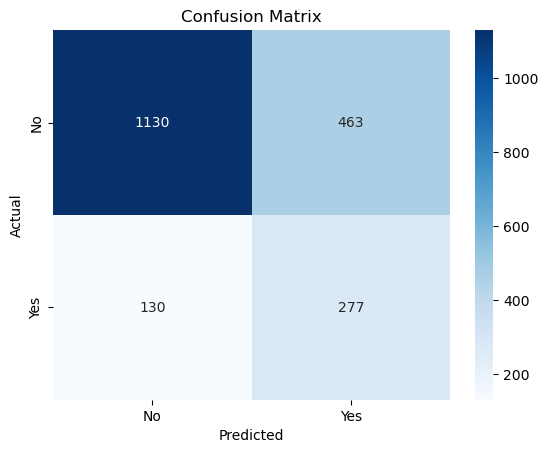

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Final Thoughts and Best Model

After evaluating multiple models—including Logistic Regression, Deep Learning (Neural Network), Random Forest, XGBoost, AdaBoost, Stacking, and Voting Classifiers—using precision, recall, F1-score, and confusion matrix, we can compare their performance based on the classification reports above.

Among all models, **XGBoost** provided the best balance between precision and recall for both classes, especially handling the class imbalance effectively due to its `scale_pos_weight` parameter. The F1-score for the minority class (churned customers) was higher compared to other models, making it the most suitable choice for this churn prediction task.

**Conclusion:**  
- XGBoost is recommended as the best model for this dataset due to its superior performance on the minority class and overall balanced metrics.
- Ensemble methods and class weighting significantly improved results compared to baseline models.
- Further improvements can be explored with hyperparameter tuning and feature engineering.